In [1]:
#importing the libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
from sklearn.datasets import load_iris
data = load_iris()
x = data['data']
y = data['target']
print(x.shape)

(150, 4)


In [21]:
x.shape

(150, 4)

In [23]:
#dataset head
dataset = pd.DataFrame(data=np.concatenate((x,y.reshape(-1,1)),axis=1),columns=['sepal length','sepal width','petal length','petal width','target'])
dataset.head()


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
#dataset dail
dataset.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [3]:
#train, test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True)

In [4]:
#model (Keras - Fuctional API)
i = tf.keras.layers.Input(shape=(4))
X = tf.keras.layers.Dense(3,activation=tf.keras.activations.softmax)(i)
model = tf.keras.models.Model(i,X) 

In [5]:
#compile and fit the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
train = model.fit(x_train,y_train.reshape(-1),validation_data=(x_test,y_test.reshape(-1)),epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 24ms/step - loss: 1.5309 - accuracy: 0.1185 - val_loss: 1.4150 - val_accuracy: 0.0667
Epoch 2/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4563 - accuracy: 0.1037 - val_loss: 1.3314 - val_accuracy: 0.2000
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 1.4120 - accuracy: 0.1037 - val_loss: 1.2992 - val_accuracy: 0.0667
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3520 - accuracy: 0.1333 - val_loss: 1.2407 - val_accuracy: 0.2000
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 1.3112 - accuracy: 0.1407 - val_loss: 1.2101 - val_accuracy: 0.0667
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.1259 - val_loss: 1.1656 - val_accuracy: 0.1333
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 1.2205 - accuracy: 0.1704 - val_loss: 1.1502 - val_accuracy: 0.2667
Epoch 8/200
5/5 [=========

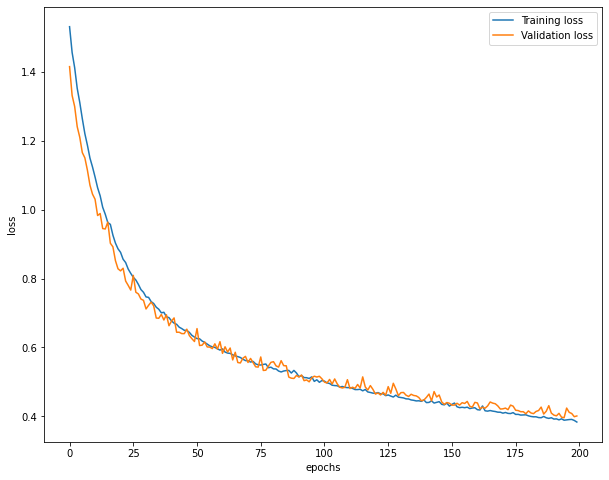

In [7]:
#plotting loss over epochs
plt.figure(figsize=(10,8))
plt.plot(train.history['loss'],label='Training loss')
plt.plot(train.history['val_loss'],label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

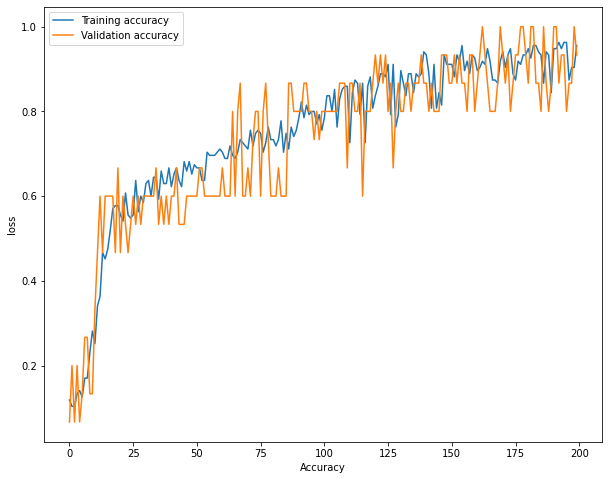

In [12]:
#plotting accuracy over epochs
plt.figure(figsize=(10,8))
plt.plot(train.history['accuracy'],label='Training accuracy')
plt.plot(train.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('loss')
plt.legend()